## Trabalho Final de Classificação: SVD da Disciplina de Algebra Linear

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob
from sklearn.model_selection import train_test_split as division
from sklearn.decomposition import PCA

### Redimensionando o tamanho das imagens de 400x400 para 40x40

In [2]:
images = glob.glob('*/*/*.png')

for file in images:
    img = Image.open(file)
    width, height = img.size
    (new_width, new_height) = (40, 40)
    img = img.resize(
        (round(new_width),
        round(new_height)),
        Image.ANTIALIAS)
    img.save(file, format='png')

### Convertendo as imagens de RGB para níveis de cinza (monocromáticas)

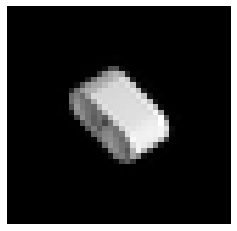

tamanho da dimensão da imagem retirando o RGB: (40, 40)


In [3]:
for file in images:
    img = Image.open(file).convert('L')
    img.save(file, format='png')

images_array = np.asarray(glob.glob('*/*/*.png'))
teste = Image.open(images_array[0])
teste = np.asarray(teste, dtype=np.float32)/255

plt.figure(figsize=(4, 4))
im = plt.imshow(teste, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()
print("tamanho da dimensão da imagem retirando o RGB:", teste.shape)

### Dividindo as imagens em treino e teste (80% treino e 20% teste) e compondo nossa matriz de dados de treino com os dados das imagens de treino

dimensão da matriz de dados de treino: (32000, 1600)


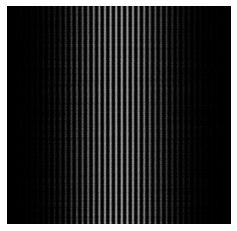

In [5]:
images_array = np.asarray(glob.glob('*/*/*.png'))
images_train, images_test = division(images_array, test_size=0.2, random_state=5)
data_matrix = Image.open(images_train[0])
data_matrix = np.asarray(data_matrix, dtype=np.float32)/255
data_matrix = np.reshape(data_matrix, (1, 1600))

for i in range(1, images_train.shape[0]):
        aux = Image.open(images_train[i])
        aux = np.asarray(aux, dtype=np.float32)/255
        aux = np.reshape(aux, (1, 1600))
        data_matrix = np.vstack((data_matrix, aux))

print("dimensão da matriz de dados de treino:", data_matrix.shape)
plt.figure(figsize=(4, 4))
im = plt.imshow(data_matrix, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()

### Centralizando a matriz de dados original X^ obtendo a matriz X.

In [6]:
centralized_data_matrix = data_matrix - np.mean(data_matrix, axis=0)
print(centralized_data_matrix.shape)

(32000, 1600)


### Calculando a decomposição espectral da matriz de covariância dos dados, isto é, cov(X) = QΛQT, usando a função do NumPy:
### np.linalg.eigh(cov(X)).

In [7]:
cov_centralized_data_matrix = np.cov(centralized_data_matrix, rowvar=0)

w, q = np.linalg.eigh(cov_centralized_data_matrix)

print(w)
print(q)

[-6.05157458e-17 -5.05469670e-17 -2.74215885e-17 ...  1.75704463e+00
  2.00499990e+00  5.86672005e+00]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Ordenando os autovalores e autovetores correspondentes em ordem decrescente

In [8]:
index = np.argsort(w)[::-1]

w_dec = w[index]
q_dec = q[index]

print(w_dec)
print(q_dec)

[ 5.86672005e+00  2.00499990e+00  1.75704463e+00 ... -2.74215885e-17
 -5.05469670e-17 -6.05157458e-17]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Tarefas

### Calcular, para o respectivo banco de dados, a SVD da matriz de dados centralizados X. Gerar um gráco de número de valores singulares versus variabilidade acumulada.

In [9]:
u, s, vt = np.linalg.svd(centralized_data_matrix, full_matrices=False)
print(u.shape)
print(s.shape)
print(vt.shape)

(32000, 1600)
(1600,)
(1600, 1600)


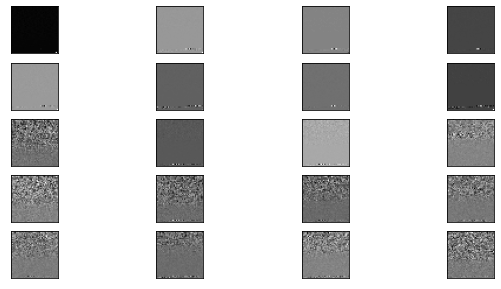

In [10]:
fig = plt.figure(figsize=(10,5))
for i in range(20):
    sub = fig.add_subplot(5, 4,i+1)
    sub.imshow(np.reshape(u[i,:], (40,40)), cmap='gray')
    sub.set_xticks([])
    sub.set_yticks([])
    sub.set_xticklabels([])
    sub.set_yticklabels([])

In [63]:
vetores = np.array([0])
variabilidade_acumulada = np.array([0])

for i in range(0, s.shape[0]-1, 10):
    aux = 100*((np.sum(s[0:i])**2)/(np.sum(s)**2))
    variabilidade_acumulada = np.hstack((variabilidade_acumulada, aux))

    vetores = np.hstack((vetores, i))

    print(f'Vetores singulares: {i}, Variabilidade acumulada: {aux:.5f}')

Vetores singulares: 0, Variabilidade acumulada: 0.00000
Vetores singulares: 10, Variabilidade acumulada: 2.60720
Vetores singulares: 20, Variabilidade acumulada: 5.31590
Vetores singulares: 30, Variabilidade acumulada: 7.85311
Vetores singulares: 40, Variabilidade acumulada: 10.22637
Vetores singulares: 50, Variabilidade acumulada: 12.46182
Vetores singulares: 60, Variabilidade acumulada: 14.67273
Vetores singulares: 70, Variabilidade acumulada: 16.73267
Vetores singulares: 80, Variabilidade acumulada: 18.69131
Vetores singulares: 90, Variabilidade acumulada: 20.55466
Vetores singulares: 100, Variabilidade acumulada: 22.34586
Vetores singulares: 110, Variabilidade acumulada: 24.07863
Vetores singulares: 120, Variabilidade acumulada: 25.76283
Vetores singulares: 130, Variabilidade acumulada: 27.39819
Vetores singulares: 140, Variabilidade acumulada: 29.00413
Vetores singulares: 150, Variabilidade acumulada: 30.56840
Vetores singulares: 160, Variabilidade acumulada: 32.09915
Vetores sing

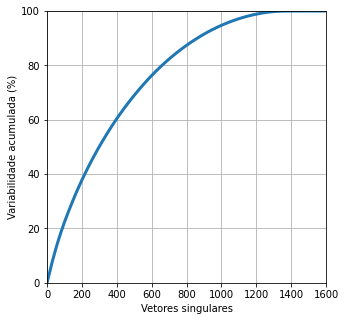

In [66]:
plt.figure(figsize=(5,5))
plt.plot(vetores,variabilidade_acumulada, lw=3.0)
plt.grid()
plt.ylabel("Variabilidade acumulada (%)")
plt.xlabel("Vetores singulares")
plt.axis([0, s.shape[0], 0, 100])
plt.show()

In [67]:
pca = PCA(n_components=700)
pca.fit(centralized_data_matrix)
pca.n_components

700

In [69]:
np.round(pca.explained_variance_ratio_,2)

array([0.26, 0.09, 0.08, 0.06, 0.04, 0.03, 0.03, 0.03, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.